In [2]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [74]:
# load dataset
dataset = pd.read_csv("data/5SEP - Sheet1.csv")


In [75]:
dataset.columns

Index(['Aggregated_RTT_AVG', 'Aggregated_RTT_stdev', 'RTT_avg', 'RTT_stdev',
       'Duplicate_acks', 'Triple_dupacks', 'Max_retrans', 'Min_retr_time',
       'Max_retr_time', 'Avg_retr_time', 'Sdv_retr_time', 'Outoforder_pkts',
       'Experience', 'Resolutions', 'Total_Stall_Events', 'Avg_Bit_Rate',
       'Min_Rate', 'Max_Rate', 'Shifts_Quality', '320x240', '384x288',
       '512x384', '512x384.1', '640x480', '720x480', '1280x720', '1280x720.1',
       '1920x1080', '1920x1080.1', 'Avg_stall', 'Min_stall', 'Max_tall',
       'Total_Stalls', 'Segments_High_or_Low_Resolutions', 'Segments_in_Low',
       'Segments_in_High', 'lresolutionsbystall', 'Bandwidth', 'Packetloss',
       'Hosts_Competitions', 'MPD', 'Total_Packets', 'Througput',
       'RTT_Samples'],
      dtype='object')

In [76]:
dataset = dataset[(dataset['Experience'] != 'remove')]

In [77]:
dataset.shape

(373, 44)

In [78]:
#dataset = dataset[(dataset['Hosts_Competitions']=='Low')]

In [79]:
dataset.head()

,Aggregated_RTT_AVG,Aggregated_RTT_stdev,RTT_avg,RTT_stdev,Duplicate_acks,Triple_dupacks,Max_retrans,Min_retr_time,Max_retr_time,Avg_retr_time,...,Segments_in_Low,Segments_in_High,lresolutionsbystall,Bandwidth,Packetloss,Hosts_Competitions,MPD,Total_Packets,Througput,RTT_Samples
0,0.24,2.18,0.2,2.0,1,0,0,0,0,0,...,4,41,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,8696,194999,8206
1,0.24,2.18,0.3,2.4,0,0,0,0,0,0,...,12,33,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,9358,204942,8781
2,0.24,2.18,0.2,2.1,0,0,0,0,0,0,...,3,42,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,15789,349629,14796
3,0.24,2.18,0.3,2.6,1,0,0,0,0,0,...,6,39,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,9119,206295,8632
4,0.24,2.18,0.2,1.8,1,0,0,0,0,0,...,3,42,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,11496,258651,10825


In [80]:
#y_pred = (y_pred > 0.5) 

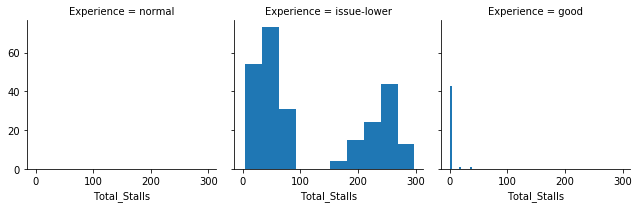

In [81]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stalls')

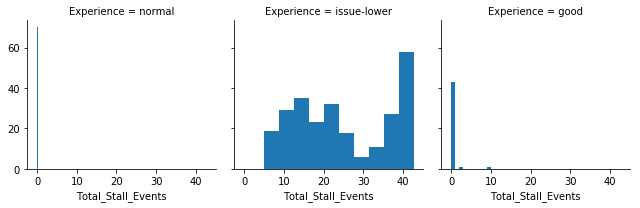

In [82]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stall_Events')

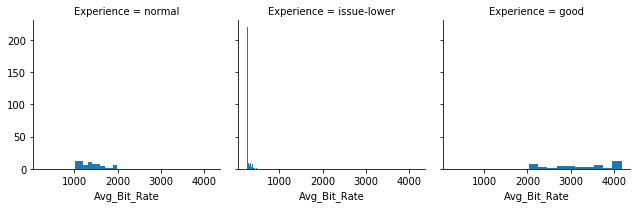

In [83]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Avg_Bit_Rate')

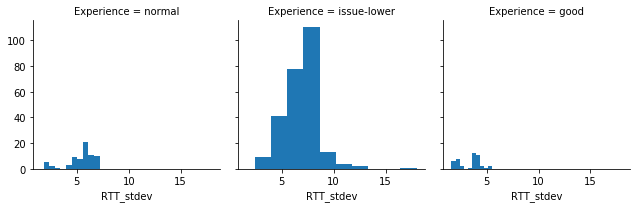

In [84]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_stdev')

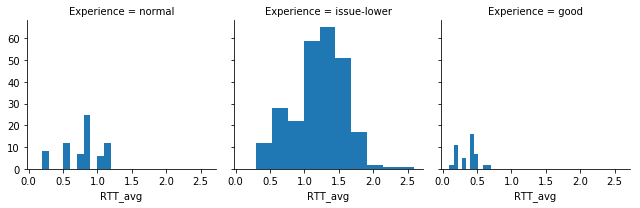

In [85]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_avg')

In [86]:
myP = ["#c26b00", "#242526", "#82096e", "#103009", "#34495e", "#c26b00", "#c2a200", "#0015b8", "#78282a", "#fc030b"]


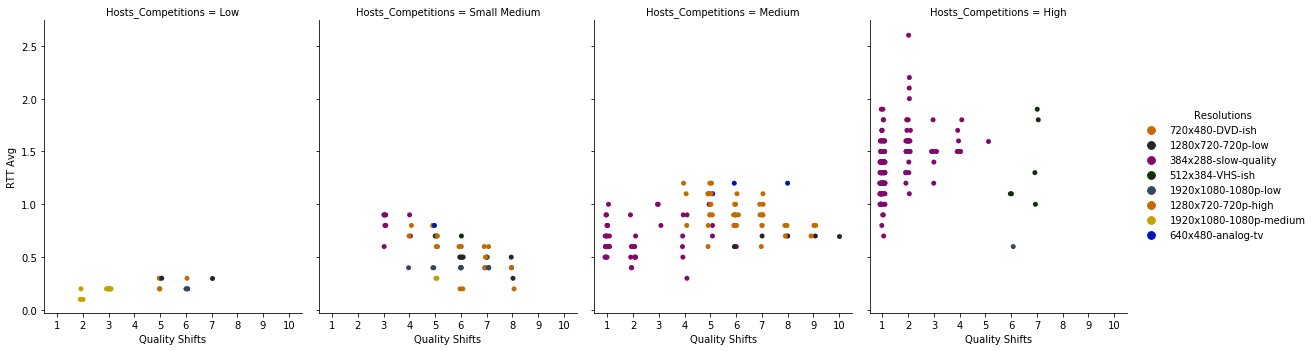

In [87]:
g = sns.catplot(x="Shifts_Quality", y="RTT_avg", col="Hosts_Competitions",palette=myP, data=dataset, hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Avg")

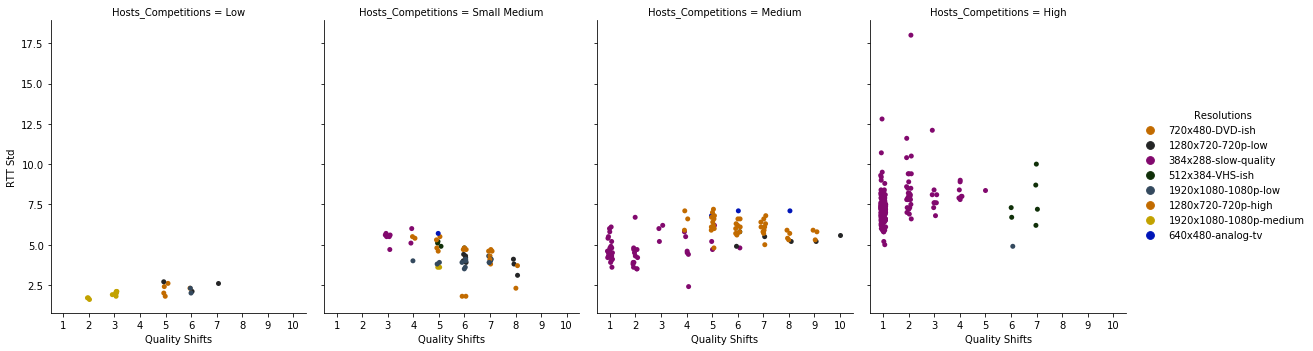

In [88]:
g = sns.catplot(x="Shifts_Quality", y="RTT_stdev", col="Hosts_Competitions",palette=myP, data=dataset,hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Std")

In [89]:
#dataset['RTT_stdev'] = dataset['RTT_stdev'].astype(np.int64)

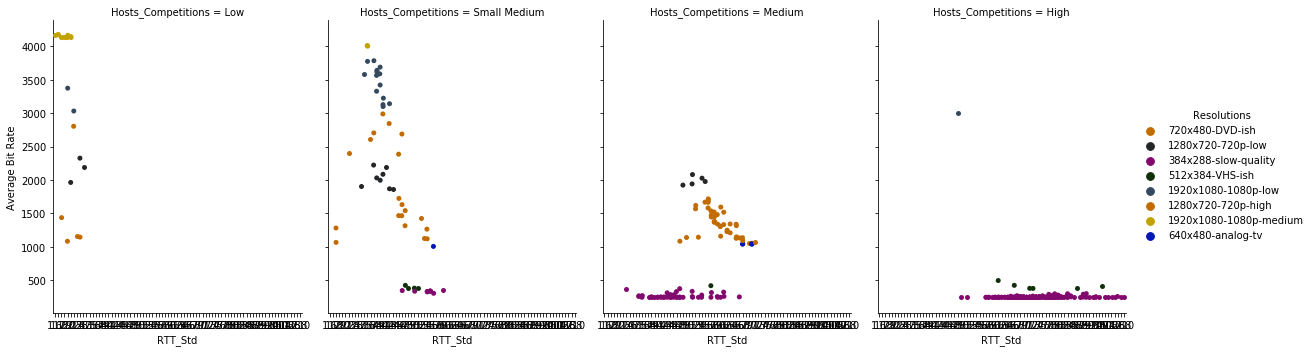

In [90]:
g = sns.catplot(x="RTT_stdev", y="Avg_Bit_Rate", col="Hosts_Competitions", palette=myP,data=dataset, height=5, aspect=.8,hue="Resolutions")
g.set_axis_labels("RTT_Std", "Average Bit Rate")

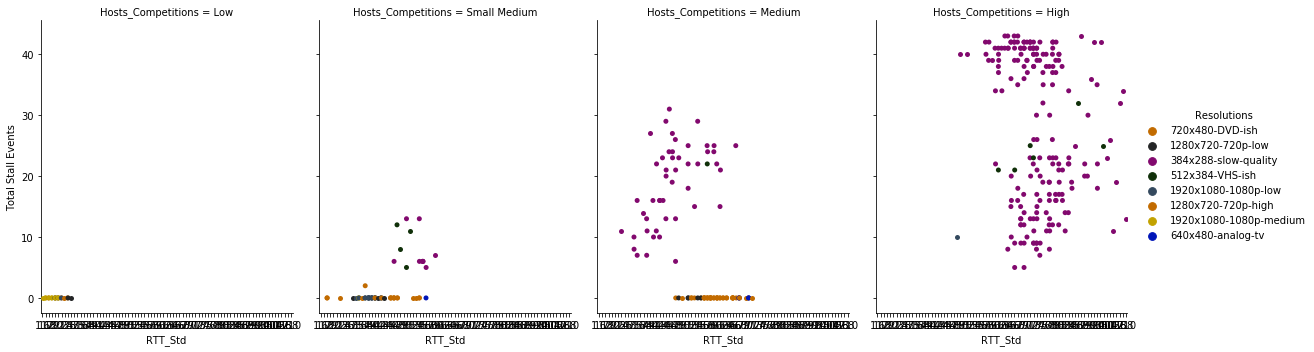

In [91]:
g = sns.catplot(x="RTT_stdev", y="Total_Stall_Events",col="Hosts_Competitions", palette=myP,data=dataset, hue="Resolutions", height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Total Stall Events")

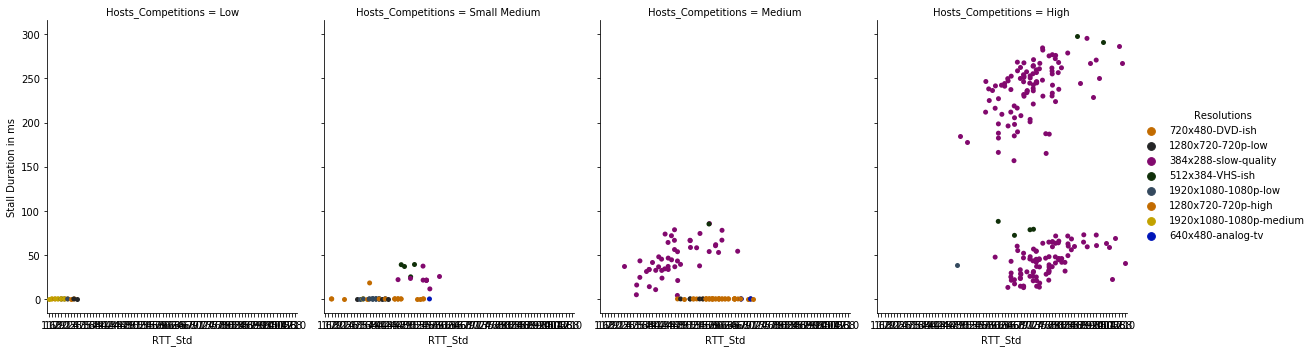

In [92]:
g = sns.catplot(x="RTT_stdev", y="Total_Stalls", hue="Resolutions",col="Hosts_Competitions",palette=myP,data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Stall Duration in ms")

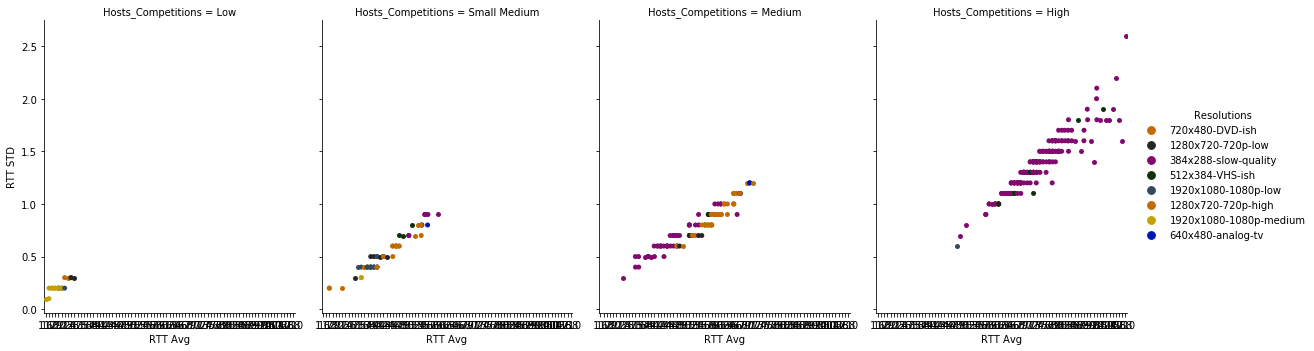

In [93]:
g = sns.catplot(x="RTT_stdev", y="RTT_avg",col="Hosts_Competitions", hue="Resolutions",palette=myP, data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT Avg", "RTT STD")

In [94]:
#dataset1 = pd.read_csv("data/30AUG.csv")

In [95]:

#X = dataset[['RTT_avg', 'RTT_stdev', 'Triple_dupacks','Max_retrans','Min_retr_time','Max_retr_time','Avg_retr_time','Sdv_retr_time','Outoforder_pkts']]
#Y = dataset['Labels']

In [96]:
target_count = dataset.Experience.value_counts()
#print('Class 0:', target_count[0])
#print('Class 1:', target_count[1])

target_count

issue-lower    258
normal          70
good            45
Name: Experience, dtype: int64

In [97]:
#dataset = dataframe.values
X = dataset.iloc[:,2:12].values


In [98]:
X

array([[0.2, 2. , 1. , ..., 0. , 0. , 0. ],
       [0.3, 2.4, 0. , ..., 0. , 0. , 0. ],
       [0.2, 2.1, 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 6.6, 1. , ..., 0. , 0. , 0. ],
       [0.8, 5.7, 1. , ..., 0. , 0. , 0. ],
       [0.6, 4.9, 2. , ..., 0. , 0. , 3. ]])

In [99]:
Y = dataset.iloc[:,12].values

In [100]:
Y

array(['normal', 'normal', 'normal', 'normal', 'normal', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'normal', 'issue-lower',
       'issue-lower', 'issue-lower', 'normal', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',


In [101]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

In [102]:
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

W0904 16:20:30.758992 140543377602368 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 16:20:30.983331 140543377602368 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 16:20:31.034220 140543377602368 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 16:20:31.120925 140543377602368 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 16:20:31.1

acc: 84.21%
Train: 0.842, Test: 0.842


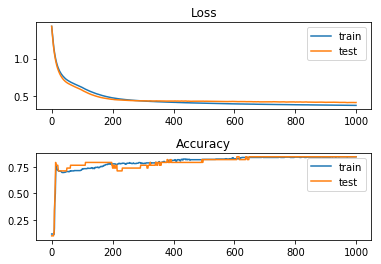

acc: 84.21%
Train: 0.854, Test: 0.842


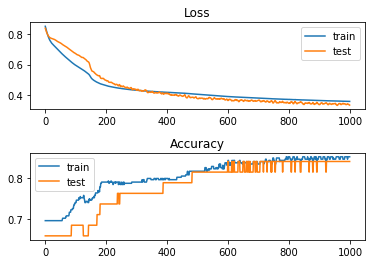

acc: 84.21%
Train: 0.794, Test: 0.842


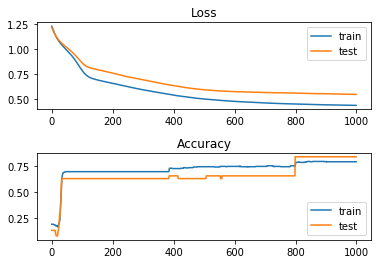

acc: 89.19%
Train: 0.836, Test: 0.892


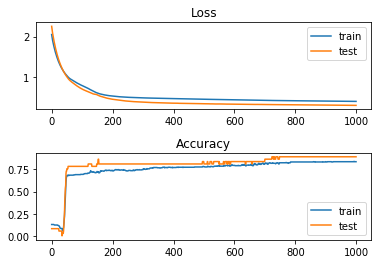

acc: 83.78%
Train: 0.845, Test: 0.838


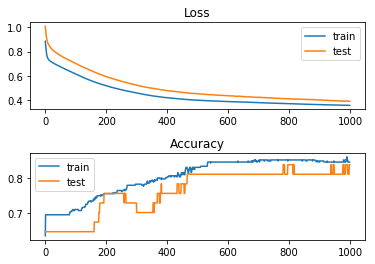

acc: 91.89%
Train: 0.854, Test: 0.919


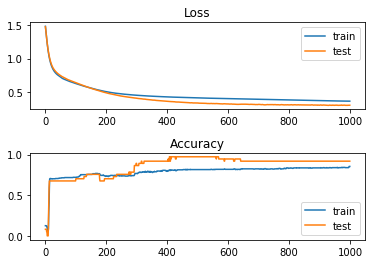

acc: 83.78%
Train: 0.860, Test: 0.838


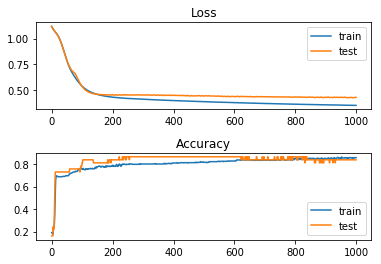

acc: 78.38%
Train: 0.869, Test: 0.784


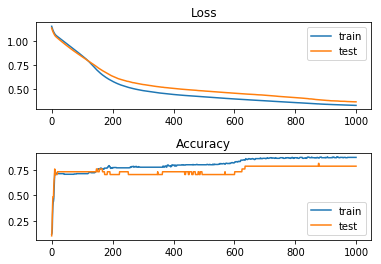

acc: 75.68%
Train: 0.845, Test: 0.757


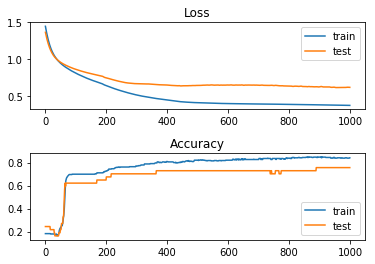

acc: 86.49%
Train: 0.836, Test: 0.865


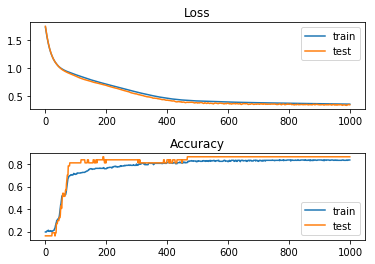

84.18% (+/- 4.43%)


In [103]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(5, input_dim=10, activation='relu'))
	model.add(Dense(5, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	history = model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=1000, batch_size=128, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=2)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
	_, train_acc = model.evaluate(X[train], Y[train], verbose=2)
	_, test_acc = model.evaluate(X[test], Y[test], verbose=2)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	plt.subplots_adjust(hspace=0.5)
# plot loss during training
	plt.subplot(211)
	plt.title('Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.legend()
# plot accuracy during training
	plt.subplot(212)
	plt.title('Accuracy')
	plt.plot(history.history['acc'], label='train')
	plt.plot(history.history['val_acc'], label='test')
	plt.legend()
	plt.show()
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [104]:
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

84.18% (+/- 4.43%)


In [105]:
y_pred = model.predict(X[test])

In [106]:
#y_pred = (y_pred > 0.5) 

In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y[test].argmax(axis=1), y_pred.argmax(axis=1))

In [108]:
cm

array([[ 2,  0,  1],
       [ 0, 26,  2],
       [ 2,  0,  4]])

In [109]:
print(classification_report(Y[test].argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      0.93      0.96        28
           2       0.57      0.67      0.62         6

    accuracy                           0.86        37
   macro avg       0.69      0.75      0.72        37
weighted avg       0.89      0.86      0.87        37



In [110]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.10.0


In [111]:
import cufflinks as cf

In [112]:
# For Notebooks
init_notebook_mode(connected=True)

In [113]:
# For offline use
cf.go_offline()

In [114]:
dataset.iplot()